# Long Short Term Memory (LSTM) Model

Presented with [help](https://machinelearningknowledge.ai/keras-lstm-layer-explained-for-beginners-with-example/#Loading_the_Dataset) and [more help](https://www.simplilearn.com/tutorials/machine-learning-tutorial/stock-price-prediction-using-machine-learning)

LSTMs are variations of recurrent neural networks.
https://towardsdatascience.com/predicting-stock-price-with-lstm-13af86a74944

In [23]:
## Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [57]:
## Load, preprocess data
df = pd.read_csv('./TSLA.csv')

# Train on opening prices, train/test split
df = df.iloc[:, 1:2].values
train, test = train_test_split(df, test_size=0.2, random_state=21)

# Create training data with timesteps
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
X_train = []
y_train = []
for i in range(60, len(train_sc)):
    X_train.append(train_sc[i-60:i, 0])
    y_train.append(train_sc[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [26]:
## Build and fit LSTM
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.25))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.25))

model.add(LSTM(units = 50))
model.add(Dropout(0.25))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
70/70 [==============================] - 4s 52ms/step - loss: 0.0444
Epoch 2/100
70/70 [==============================] - 4s 50ms/step - loss: 0.0435
Epoch 3/100
70/70 [==============================] - 4s 51ms/step - loss: 0.0438
Epoch 4/100
70/70 [==============================] - 4s 51ms/step - loss: 0.0436
Epoch 5/100
70/70 [==============================] - 4s 54ms/step - loss: 0.0439
Epoch 6/100
70/70 [==============================] - 4s 61ms/step - loss: 0.0438
Epoch 7/100
70/70 [==============================] - 4s 53ms/step - loss: 0.0434
Epoch 8/100
70/70 [==============================] - 4s 52ms/step - loss: 0.0436
Epoch 9/100
70/70 [==============================] - 4s 52ms/step - loss: 0.0438
Epoch 10/100
70/70 [==============================] - 4s 53ms/step - loss: 0.0433
Epoch 11/100
70/70 [==============================] - 4s 52ms/step - loss: 0.0436
Epoch 12/100
70/70 [==============================] - 4s 53ms/step - loss: 0.0434
Epoch 13/100
70/70 [=====

In [70]:
## Predict
# Create testing data with timesteps, test with whole df
test_sc = sc.transform(df)
X_test = []
for i in range(60, len(test_sc)):
    X_test.append(test_sc[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Make predictions, convert the predicted value to range of real price data
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

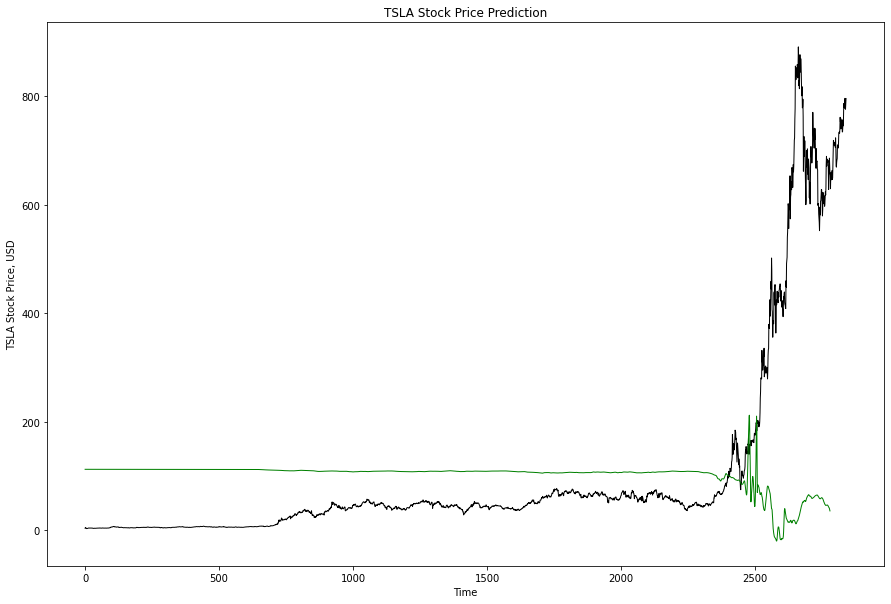

In [71]:
## Observed v. Predicted Results

real_stock_price = df

plt.figure(figsize=(15,10))
plt.plot(real_stock_price, color = 'black', linewidth = 1, label = 'TSLA Stock Price')
plt.plot(predicted_stock_price, color = 'green', linewidth = 1, label = 'TSLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TSLA Stock Price, USD')
plt.title('TSLA Stock Price Prediction')
plt.show()